In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from datetime import datetime as dt, timedelta as tmd
import tqdm


from importlib import reload

### DataLoader
import DataLoader.xAPIConnector
reload(DataLoader.xAPIConnector)
from DataLoader.xAPIConnector import *

import DataLoader.DataLoader
reload(DataLoader.DataLoader)
from DataLoader.DataLoader import *

from DataLoader.config import user_id, pwd


### Data
import Data.SymbolParser
reload(Data.SymbolParser)
from Data.SymbolParser import parse_symbols


### TrendAnalysis
import TrendAnalysis.MACD
reload(TrendAnalysis.MACD)
from TrendAnalysis.MACD import MACD

import TrendAnalysis.MA
reload(TrendAnalysis.MA)
from TrendAnalysis.MA import MA

import TrendAnalysis.RSI
reload(TrendAnalysis.RSI)
from TrendAnalysis.RSI import RSI

### MeanRevert
import MeanRevert.MeanRevert
reload(MeanRevert.MeanRevert)
from MeanRevert.MeanRevert import MeanRevert

from MeanRevert.MeanRevert import MeanRevert, MeanRevertPairs

user_id = "17340399"
pwd = "MASPROJEKT2025"

In [19]:
data = pd.read_csv('results.csv')

data.head()

,Unnamed: 0,company,commodity,strategy,mean_std,win_rate
0,0,NEM.US,gold,base,0.035336,1.0
1,1,NEM.US,gold,vs,0.001732,1.0
2,2,AU.US,gold,base,0.034093,1.0
3,3,AU.US,gold,vs,-0.223028,0.0
4,4,RGLD.US,gold,base,0.142258,1.0


In [21]:
data.sort_values('mean_std').tail(10)

,Unnamed: 0,company,commodity,strategy,mean_std,win_rate
7,7,CDE.US,gold,vs,0.130079,1.0
22,22,RIO.US,copper,base,0.131461,1.0
21,21,BHP.US,copper,vs,0.140533,1.0
4,4,RGLD.US,gold,base,0.142258,1.0
16,16,SCCO.US,copper,base,0.154249,1.0
23,23,RIO.US,copper,vs,0.172730,1.0
10,10,GOLD.US,gold,base,0.204908,1.0
49,49,PAAS.US,silver,vs,0.221226,1.0
17,17,SCCO.US,copper,vs,0.258169,1.0
19,19,FCX.US,copper,vs,0.333243,1.0


In [2]:
def mean_std(x):
    return x.mean() / x.std()

def win_rate(x):
    return (x>0).sum() / (x!=0).sum()

agg_functions = ['count', 'mean', 'std', mean_std, win_rate]

In [3]:
Symbols = parse_symbols()

In [4]:
symbols = Symbols['silver']
start, interval = '2010-01-01', '1D'

dl = DataLoader(user_id, pwd)
data = dl.getData(symbols=symbols, start_date=start, interval=interval, verbose=False)
data = data.dropna()

[BŁĄD] Nie pobrano AYASF.US


In [15]:
word = 'COO'

In [17]:
word.capitalize()

'Coo'

AG.US -725.40078872754


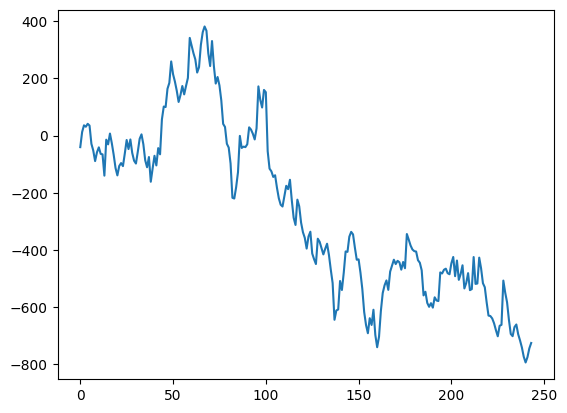

MAG.US -689.2078799031224


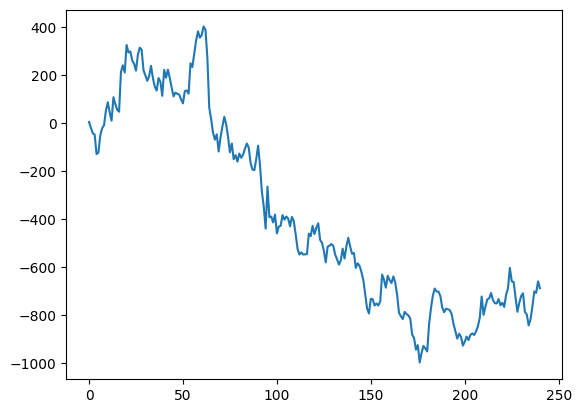

SVM.US -211.77721208977766


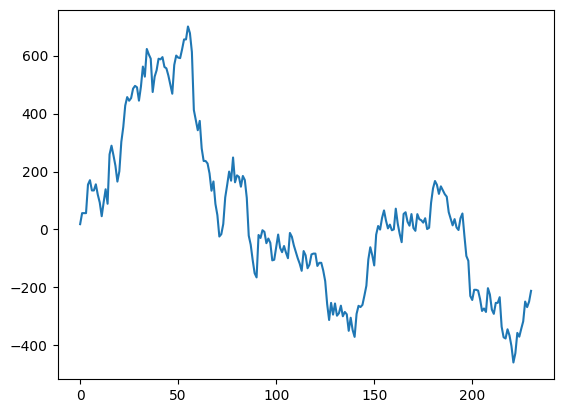

EXK.US -570.4547913815561


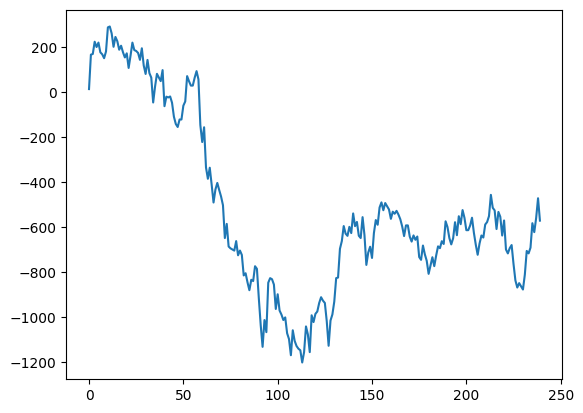

FSM.US -1020.8580073801191


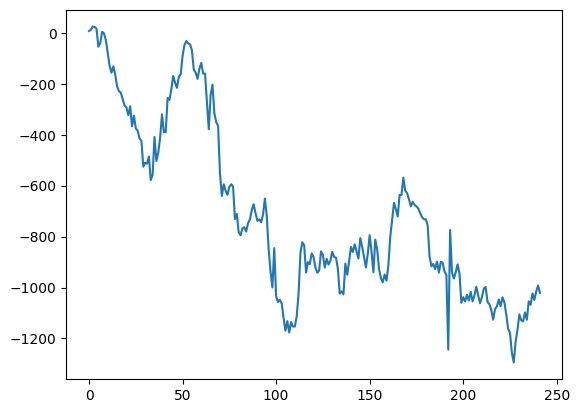

ASM.US -2347.189784747776


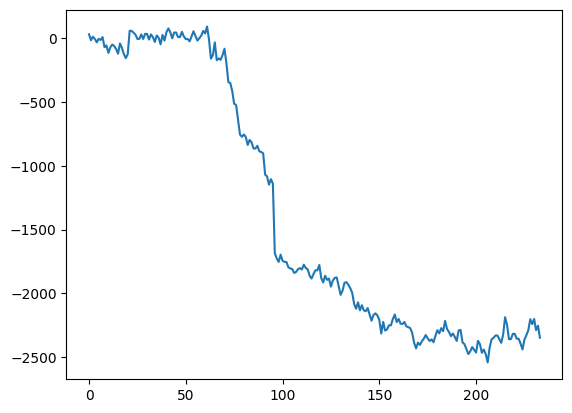

HL.US -700.3382908949726


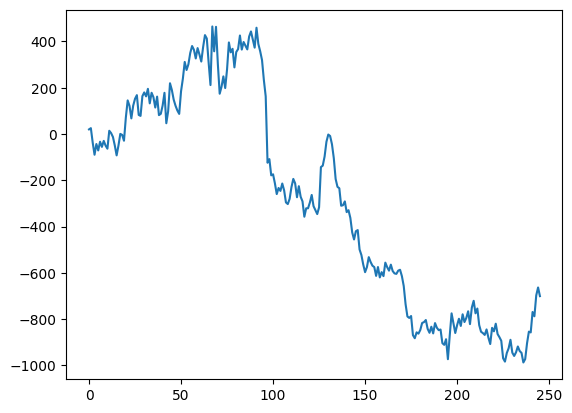

PAAS.US -528.021924546365


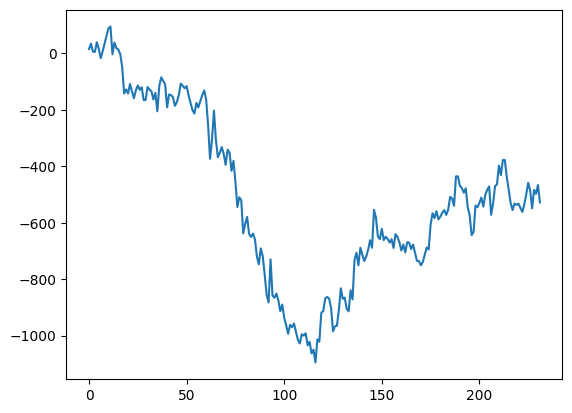

WPM.US -507.4515304205115


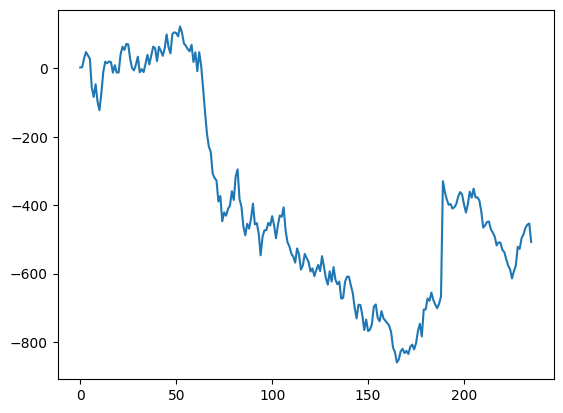

GOLD 78.44982764415747


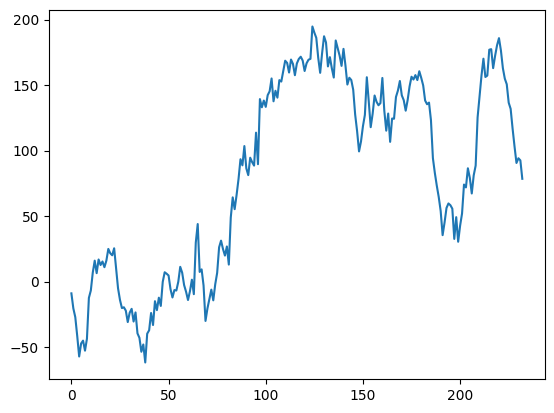

COPPER 187.28521075008788


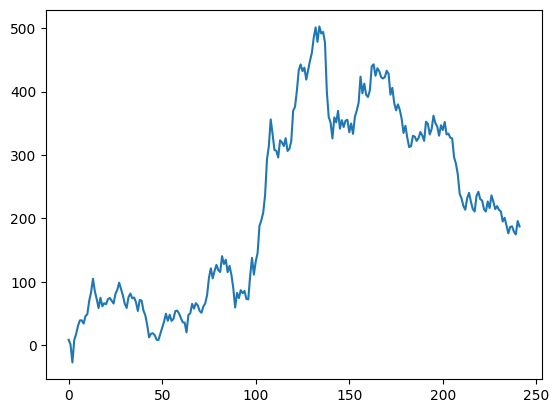

ALUMINIUM -76.47482619702043


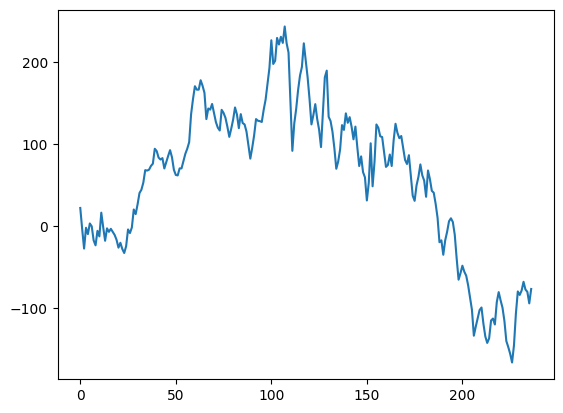

SILVER -197.62831371685178


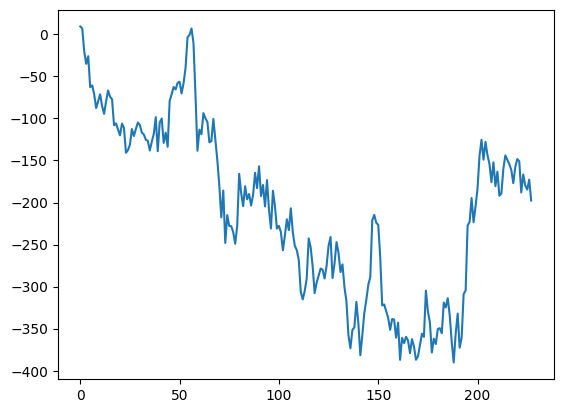

In [7]:
for col in data.columns:
    mean_revert = MeanRevert(data, col)
    mean_revert.getSignal()
    backtest_df = mean_revert.getBacktest()
    print(col, backtest_df.pnl.sum())
    backtest_df['pnl'].cumsum().plot()
    plt.show()

AG.US 2233.16722778894


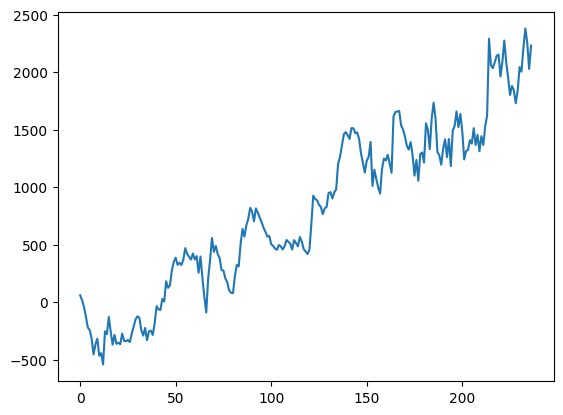

MAG.US 703.4946090374135


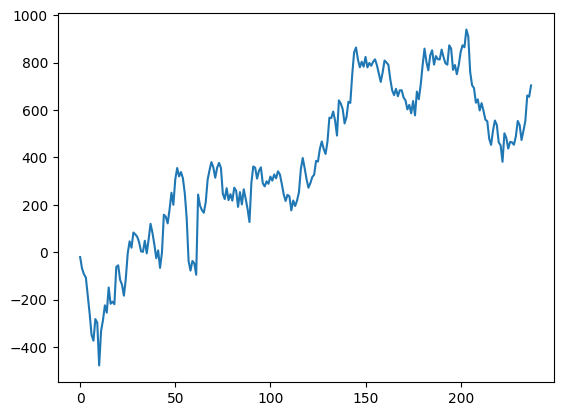

SVM.US 2697.0835179948735


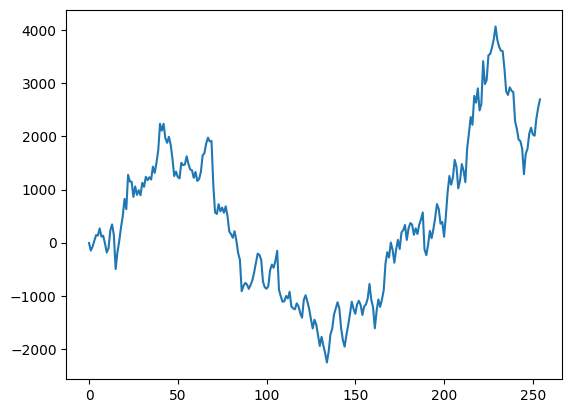

EXK.US -1023.8725453467669


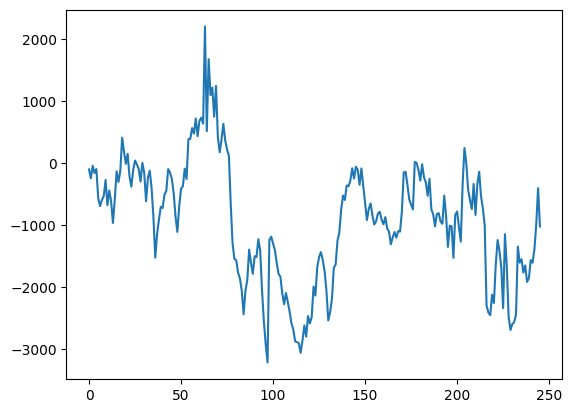

FSM.US 11365.770998185151


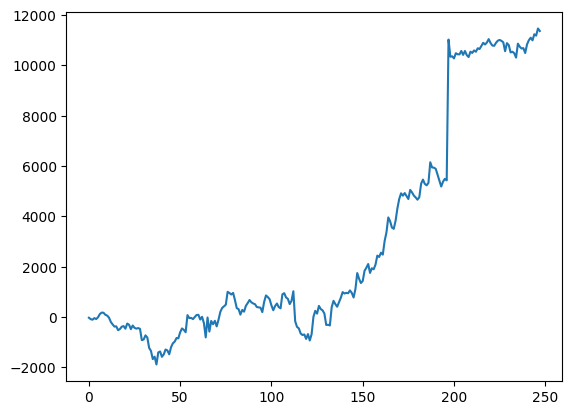

ASM.US 21125.74271901297


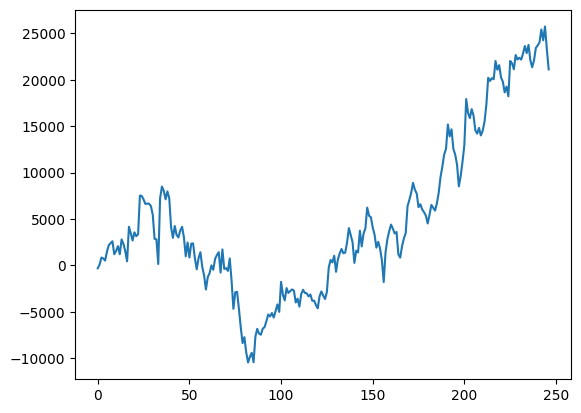

HL.US 6893.536594974816


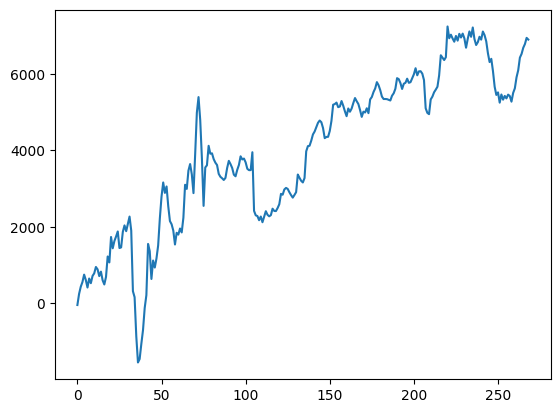

PAAS.US 2081.3427168195226


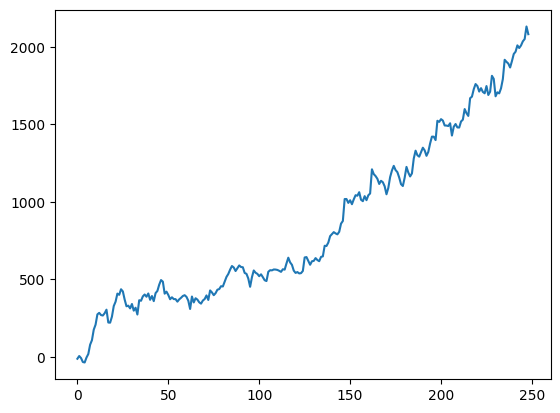

WPM.US 649.167836876265


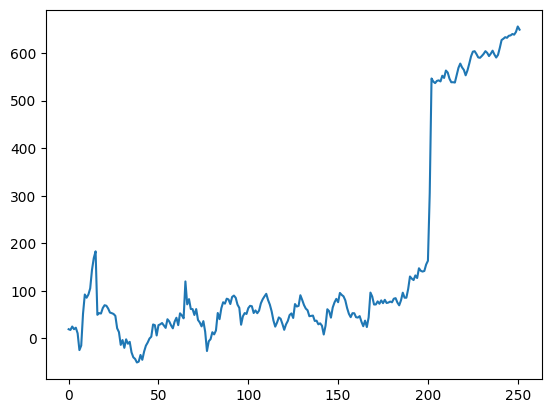

GOLD -1.4886609720167319


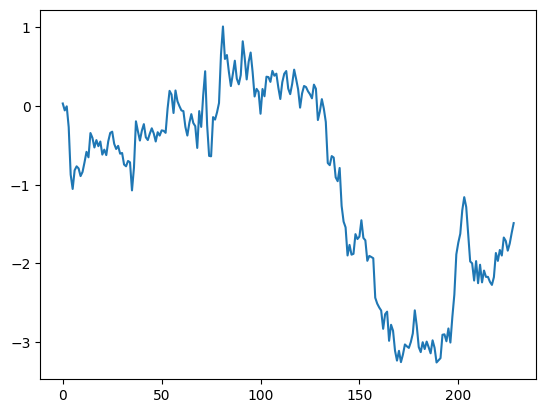

COPPER -0.4952396783707282


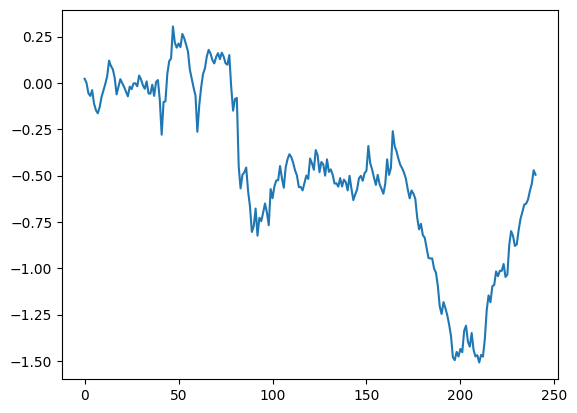

ALUMINIUM 3.7176782712523715


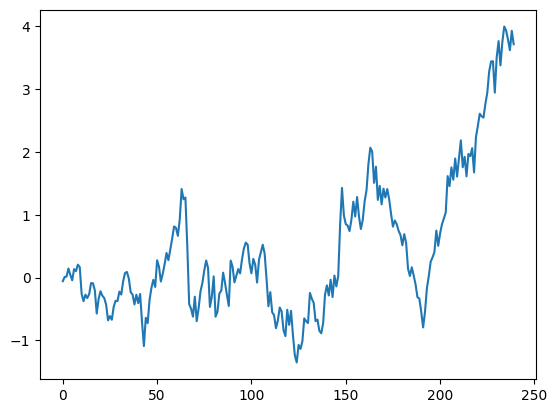

AttributeError: 'DataFrame' object has no attribute 'pnl'

In [14]:
for col in data.columns:
    mean_revert = MeanRevertPairs(data, col, 'SILVER')
    mean_revert.getSignal()

    backtest_df = mean_revert.getBacktest()
    print(col, backtest_df.pnl.sum())
    backtest_df['pnl'].cumsum().plot()
    plt.show()

<Axes: >

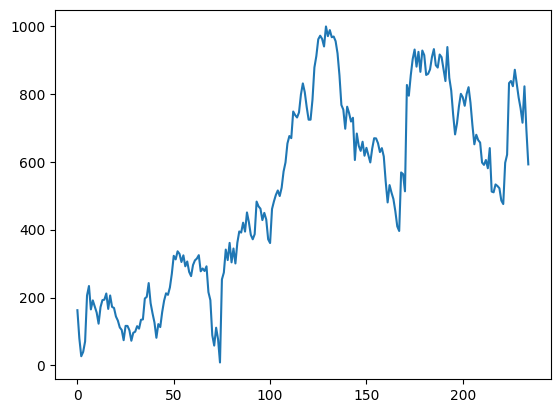

In [15]:
import yfinance as yf
import pandas as pd

# List of stock symbols for silver mining companies
symbols = [
    'SI=F',  # Silver ETF
    'EXK',     # Endeavour Silver Corp
    'FSM',     # Fortuna Silver Mines Inc
    'ASM',     # Avino Silver & Gold Mines Ltd
    'SVM',     # Silvercorp Metals Inc
    'AG',      # First Majestic Silver Corp
    'HL',      # Hecla Mining Co
    'PAAS',    # Pan American Silver Corp
    'WPM',      # Wheaton Precious Metals Corp
    'MAG',
    'CDE'
]

# Fetching data
def fetch_daily_prices(symbols):
    data = {}
    for symbol in symbols:
        try:
            ticker = yf.Ticker(symbol)
            df = ticker.history(period="5y")  # Fetch last 5 years of daily data
            if not df.empty:
                data[symbol] = df[['Close']]  # Select desired columns
        except Exception as e:
            print(f"Error fetching data for {symbol}: {e}")
    return data

# Get data
daily_prices = fetch_daily_prices(symbols)

# combined_df = pd.concat(daily_prices.values(), keys=daily_prices.keys(), names=['Symbol', 'Date'])


In [18]:
combined_df = pd.concat(daily_prices.values(), keys=daily_prices.keys(), names=['Symbol', 'Date'])

In [27]:
df = combined_df.reset_index().pivot_table('Close', 'Date', 'Symbol')

In [28]:
len(df)

1259

In [29]:
df.head()

Symbol,AG,ASM,CDE,EXK,FSM,HL,MAG,PAAS,SI=F,SVM,WPM
Date,,,,,,,,,,,
2020-01-15 00:00:00-05:00,10.942242,0.54,6.96,2.17,3.87,3.152005,10.89,20.743744,17.923000,5.424274,26.481579
2020-01-16 00:00:00-05:00,10.932346,0.53,7.03,2.22,3.91,3.142278,10.88,19.748991,17.875000,5.395215,26.368685
2020-01-17 00:00:00-05:00,10.417882,0.53,5.86,2.14,3.87,3.015808,10.54,19.475206,18.013000,5.288667,26.547424
2020-01-21 00:00:00-05:00,10.348629,0.53,5.78,2.14,4.00,3.035264,10.99,20.168791,17.750999,5.414587,27.149494
2020-01-22 00:00:00-05:00,10.220013,0.52,5.96,2.11,4.03,3.044993,11.08,20.232677,17.771000,5.385529,27.422302


In [31]:
df = df.dropna()

In [32]:
df.corr()

Symbol,AG,ASM,CDE,EXK,FSM,HL,MAG,PAAS,SI=F,SVM,WPM
Symbol,,,,,,,,,,,
AG,1.000000,0.662766,0.776713,0.762402,0.664646,0.516730,0.829684,0.804096,0.121097,0.670936,-0.226769
ASM,0.662766,1.000000,0.865647,0.855844,0.845510,0.803603,0.814365,0.792461,0.736901,0.717193,0.455679
CDE,0.776713,0.865647,1.000000,0.718313,0.902827,0.568961,0.782746,0.896994,0.476429,0.849358,0.197464
EXK,0.762402,0.855844,0.718313,1.000000,0.609716,0.866342,0.883510,0.660018,0.575588,0.489002,0.224578
FSM,0.664646,0.845510,0.902827,0.609716,1.000000,0.548249,0.694712,0.866501,0.542749,0.874640,0.293217
HL,0.516730,0.803603,0.568961,0.866342,0.548249,1.000000,0.754979,0.472149,0.756398,0.395772,0.504468
MAG,0.829684,0.814365,0.782746,0.883510,0.694712,0.754979,1.000000,0.776475,0.438537,0.653107,0.145415
PAAS,0.804096,0.792461,0.896994,0.660018,0.866501,0.472149,0.776475,1.000000,0.342661,0.892394,0.151396
SI=F,0.121097,0.736901,0.476429,0.575588,0.542749,0.756398,0.438537,0.342661,1.000000,0.298090,0.836502


<Axes: xlabel='Date'>

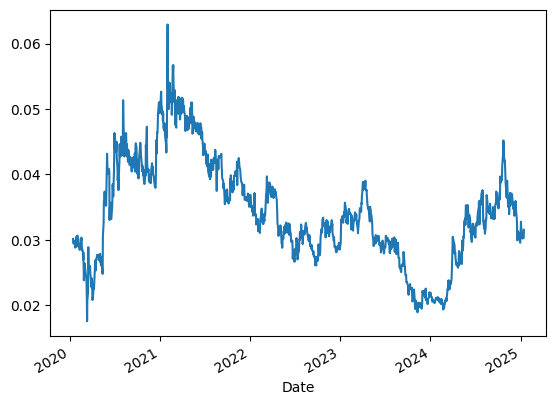

In [33]:
(df['ASM'] / df['SI=F']).plot()